# ***Astronomy and Particle Physics Club Project***
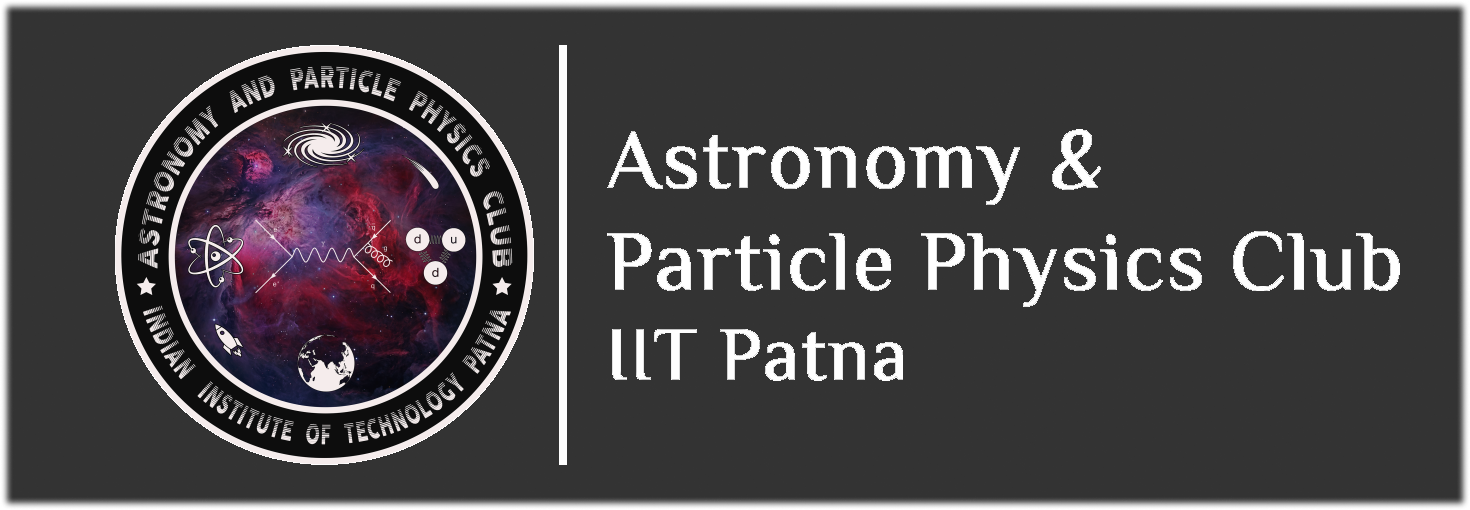

This project is a peek into **astronomical datascience** and the **applications of python in Astronomy**. 

---
Follow the code blocks to learn and implement them in the exercises' section.

---


By the end of this project, you will have your own **planet visibility catalogue** of IIT Patna ( latitude 25.53° , longitude 84.85° ).


---
Our objective is also to prepare the participants for the **Inter-IIT Tech Meet** in the domain of Astronomy. (This would serve as a starting point.)


# Project

## Problem Statement 

Aim: To generate a planet visibility catalogue of the night sky from IIT Patna between 7pm to 5am {**Local time**}.

You are given [Ephemeris](https://en.wikipedia.org/wiki/Ephemeris) data of various planets from a location in Delhi ( latitude 28.65°; longitude 77.23° ) along with sunrise and sunset timings of the same location throughout the year.

1. You are expected to make calculations to **estimate the local time difference** between the location in Delhi and IIT Patna ( latitude 25.53° , longitude 84.85°  )

2. Using the above information, create a catalogue of planets which shows when (month,date) a particular planet is visible and for what time is it observable.

3. Also state the time of the year when a particular planet is the brightest.

PS: **A planet would be labelled 'observable' if its rising/setting time does not coincide with sunset/sunrise** ( between 7pm to 5am local time of IITP). { Additionally, the planets are not visible if they are very close to the horizon, so assume a 1-hour's window before sunrise and a 1-hour's window after sunset. }



---



Links to ephemeris data :-   
Mercury: [Ephemeris_Mercury](https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_mercury.csv)   
Venus:  [Ephemeris_Venus](https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_venus.csv)  
Mars:  [Ephemeris_Mars](https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_mars.csv)   
Jupiter:  [Ephemeris_Jupiter](https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_jupiter.csv)  
Saturn:  [Ephemeris_Saturn](https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_saturn.csv)   
Uranus:  [Ephemeris_Uranus](https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_uranus.csv)   
Neptune: [Ephemeris_Neptune](https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_neptune.csv)

Sunset/Sunrise timings:-
[Sun_Ephemeris](https://github.com/DespCAP/ADS_AP/raw/main/sun_ephemeris.csv)



---



---



Feedback/Submission Link: [APC Project Submission and Feedback ](https://forms.gle/dXBnuFjdQrRsUe4V8)

If we assume a time difference of 4 minutes per degree of longitude, we can calculate the approximate time difference between Delhi and IIT Patna based on their longitude difference of 7.62 degrees:

Time Difference = Longitude Difference * Time Difference per Degree

Time Difference = 7.62 degrees * 4 minutes/degree

Time Difference ≈ 30.48 minutes

Therefore, based on this calculation, the approximate time difference between Delhi and IIT Patna would be around 30.48 minutes. Since IIT Patna is located to the east of Delhi, the local time in IIT Patna would be approximately 30.48 minutes ahead of the local time in Delhi.

In [ ]:
time_diff=30.48

In [ ]:
import pandas as pd

In [ ]:
# defined this function to modify all the dataframes to drop unncesary data and offset time for patna and also add the 1 hour time window in both rise and set timings of sun(sun)

def modify_dataframe_for_sun(df):
    df = df.drop(df.index[102:105])
    df = df.iloc[:, 0:6]
    new_column_names = {df.columns[0]: 'Year', df.columns[1]: 'Month', df.columns[2]: 'Day', df.columns[3]: 'Rise', df.columns[5]: 'Set'}
    df.rename(columns=new_column_names, inplace=True)

    if 'Unnamed: 4' in df.columns:
        df = df.drop(columns='Unnamed: 4')

    df = df.drop(df.index[0:2])

    time_offset = pd.Timedelta(minutes=time_diff)
    time_offset2= pd.Timedelta(minutes=60)

    df['Rise'] = pd.to_datetime(df['Rise'], format='%H:%M')
    df['Rise'] += time_offset
    df['Rise'] -= time_offset2
    df['Rise'] = df['Rise'].dt.strftime('%H:%M')



    df['Set'] = pd.to_datetime(df['Set'], format='%H:%M')
    df['Set'] += time_offset
    df['Set'] += time_offset2
    df['Set'] = df['Set'].dt.strftime('%H:%M')

    return df

In [ ]:
# defined this function to modify all the dataframes to drop unncesary data and offset the time for patna (planets)

def modify_dataframe_for_planets(df):
    df = df.drop(df.index[102:105])
    df = df.iloc[:, 0:7]
    new_column_names = {df.columns[0]: 'Year', df.columns[1]: 'Month', df.columns[2]: 'Day', df.columns[3]: 'Rise', df.columns[5]: 'Set',df.columns[6]:'Approx Mag'}
    df.rename(columns=new_column_names, inplace=True)
    if 'Unnamed: 4' in df.columns:
        df = df.drop(columns='Unnamed: 4')
    df = df.drop(df.index[0:2])

    time_offset = pd.Timedelta(minutes=time_diff)

    df['Rise'] = pd.to_datetime(df['Rise'], format='%H:%M')
    df['Rise'] += time_offset

    df['Rise'] = df['Rise'].dt.strftime('%H:%M')

    df['Set'] = pd.to_datetime(df['Set'], format='%H:%M')
    df['Set'] += time_offset

    df['Set'] = df['Set'].dt.strftime('%H:%M')

    return df

In [ ]:
def is_within_time_interval(time_str, start_time, end_time):
    # Convert time strings to integers for comparison
    time = int(time_str.replace(":", ""))
    start = int(start_time.replace(":", ""))
    end = int(end_time.replace(":", ""))

    if start <= end:
        return start <= time <= end
    else:
        return time >= start or time <= end


In [ ]:
dataset1 = 'https://raw.githubusercontent.com/DespCAP/ADS_AP/main/sun_ephemeris.csv'
sun_timings_in_delhi= pd.read_csv(dataset1)
sun_timings_in_patna= modify_dataframe_for_sun(sun_timings_in_delhi)
display(sun_timings_in_patna)


,Year,Month,Day,Rise,Set
2,2023,Jul,1,04:54,20:52
3,2023,Jul,8,04:56,20:52
4,2023,Jul,15,05:00,20:50
5,2023,Jul,22,05:04,20:48
6,2023,Aug,1,05:09,20:42
...,...,...,...,...,...
97,2025,Jun,22,04:51,20:51
98,2025,Jul,1,04:54,20:52
99,2025,Jul,8,04:56,20:52
100,2025,Jul,15,05:00,20:50


In [ ]:
def calculate_visibility_for_planets(visibility_planet, planet_timings_in_patna):
    visibility_planet_copy = visibility_planet.copy()

    for i in range(100):
        var1 = is_within_time_interval(planet_timings_in_patna.iloc[i][3], sun_timings_in_patna.iloc[i][4], sun_timings_in_patna.iloc[i][3])
        var2 = is_within_time_interval(planet_timings_in_patna.iloc[i][4], sun_timings_in_patna.iloc[i][4], sun_timings_in_patna.iloc[i][3])

        if var1 and var2:
            visibility_planet_copy.loc[i, 'Visibility'] = True
            visibility_planet_copy.loc[i, 'From'] = planet_timings_in_patna.iloc[i][3]
            visibility_planet_copy.loc[i, 'To'] = planet_timings_in_patna.iloc[i][4]
        elif var1 and not var2:
            visibility_planet_copy.loc[i, 'Visibility'] = True
            visibility_planet_copy.loc[i, 'From'] = planet_timings_in_patna.iloc[i][3]
            visibility_planet_copy.loc[i, 'To'] = sun_timings_in_patna.iloc[i][3]
        elif not var1 and var2:
            visibility_planet_copy.loc[i, 'Visibility'] = True
            visibility_planet_copy.loc[i, 'From'] = sun_timings_in_patna.iloc[i][4]
            visibility_planet_copy.loc[i, 'To'] = planet_timings_in_patna.iloc[i][4]
        else:
            visibility_planet_copy.loc[i, 'Visibility'] = False

    return visibility_planet_copy

In [ ]:
dataset2='https://raw.githubusercontent.com/DespCAP/ADS_AP/main/ephemeris_mercury.csv'
mercury_timings_in_delhi= pd.read_csv(dataset2)
mercury_timings_in_patna=modify_dataframe_for_planets(mercury_timings_in_delhi)
display(mercury_timings_in_patna)

,Year,Month,Day,Rise,Set,Approx Mag
2,2023,Jul,1,05:48,19:49,-2.3
3,2023,Jul,8,06:29,20:24,-1.4
4,2023,Jul,15,07:07,20:46,-0.7
5,2023,Jul,22,07:38,20:57,-0.3
6,2023,Aug,1,08:09,20:59,0
...,...,...,...,...,...,...
97,2025,Jun,22,07:29,21:23,-0.2
98,2025,Jul,1,07:52,21:28,0.2
99,2025,Jul,8,07:57,21:18,0.7
100,2025,Jul,15,07:48,20:57,1.3


In [ ]:
cols=['Year','Month','Day','Visibility','From','To','Approx Mag']
visibility_mercury= pd.DataFrame(columns=cols)

visibility_mercury['Year']=mercury_timings_in_patna['Year']
visibility_mercury['Month']=mercury_timings_in_patna['Month']
visibility_mercury['Day']=mercury_timings_in_patna['Day']
visibility_mercury['Approx Mag']=mercury_timings_in_patna['Approx Mag']

visibility_mercury=visibility_mercury.reset_index(drop=True)


visibility_mercury = calculate_visibility_for_planets(visibility_mercury,mercury_timings_in_patna)
display(visibility_mercury)

,Year,Month,Day,Visibility,From,To,Approx Mag
0,2023,Jul,1,False,NaN,NaN,-2.3
1,2023,Jul,8,False,NaN,NaN,-1.4
2,2023,Jul,15,False,NaN,NaN,-0.7
3,2023,Jul,22,True,20:48,20:57,-0.3
4,2023,Aug,1,True,20:42,20:59,0
...,...,...,...,...,...,...,...
95,2025,Jun,22,True,20:51,21:23,-0.2
96,2025,Jul,1,True,20:52,21:28,0.2
97,2025,Jul,8,True,20:52,21:18,0.7
98,2025,Jul,15,True,20:50,20:57,1.3


In [ ]:
dataset3='https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_venus.csv'
venus_timings_in_delhi= pd.read_csv(dataset3)
venus_timings_in_patna=modify_dataframe_for_planets(venus_timings_in_delhi)

In [ ]:
visibility_venus= pd.DataFrame(columns=cols)

visibility_venus['Year']=venus_timings_in_patna['Year']
visibility_venus['Month']=venus_timings_in_patna['Month']
visibility_venus['Day']=venus_timings_in_patna['Day']
visibility_venus['Approx Mag']=venus_timings_in_patna['Approx Mag']

visibility_venus=visibility_venus.reset_index(drop=True)

visibility_venus = calculate_visibility_for_planets(visibility_venus,venus_timings_in_patna)
display(visibility_venus)

,Year,Month,Day,Visibility,From,To,Approx Mag
0,2023,Jul,1,True,20:52,22:22,-4.5
1,2023,Jul,8,True,20:52,22:03,-4.5
2,2023,Jul,15,True,20:50,21:40,-4.5
3,2023,Jul,22,True,20:48,21:11,-4.4
4,2023,Aug,1,False,NaN,NaN,-4.2
...,...,...,...,...,...,...,...
95,2025,Jun,22,True,03:10,04:51,-4.2
96,2025,Jul,1,True,03:07,04:54,-4.1
97,2025,Jul,8,True,03:07,04:56,-4.1
98,2025,Jul,15,True,03:08,05:00,-4.1


In [ ]:
dataset4='https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_mars.csv'
mars_timings_in_delhi= pd.read_csv(dataset4)
mars_timings_in_patna=modify_dataframe_for_planets(mars_timings_in_delhi)

In [ ]:
visibility_mars=pd.DataFrame(columns=cols)

visibility_mars['Year']=mars_timings_in_patna['Year']
visibility_mars['Month']=mars_timings_in_patna['Month']
visibility_mars['Day']=mars_timings_in_patna['Day']
visibility_mars['Approx Mag']=mars_timings_in_patna['Approx Mag']

visibility_mars=visibility_mars.reset_index(drop=True)

visibility_mars = calculate_visibility_for_planets(visibility_mars,mars_timings_in_patna)
display(visibility_mars)

,Year,Month,Day,Visibility,From,To,Approx Mag
0,2023,Jul,1,True,20:52,22:36,1.7
1,2023,Jul,8,True,20:52,22:21,1.7
2,2023,Jul,15,True,20:50,22:06,1.8
3,2023,Jul,22,True,20:48,21:51,1.8
4,2023,Aug,1,True,20:42,21:29,1.8
...,...,...,...,...,...,...,...
95,2025,Jun,22,True,20:51,23:34,1.4
96,2025,Jul,1,True,20:52,23:13,1.5
97,2025,Jul,8,True,20:52,22:57,1.5
98,2025,Jul,15,True,20:50,22:41,1.5


In [ ]:
dataset5='https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_jupiter.csv'
jupiter_timings_in_delhi= pd.read_csv(dataset5)
jupiter_timings_in_patna=modify_dataframe_for_planets(jupiter_timings_in_delhi)

In [ ]:
visibility_jupiter=pd.DataFrame(columns=cols)

visibility_jupiter['Year']=jupiter_timings_in_patna['Year']
visibility_jupiter['Month']=jupiter_timings_in_patna['Month']
visibility_jupiter['Day']=jupiter_timings_in_patna['Day']
visibility_jupiter['Approx Mag']=jupiter_timings_in_patna['Approx Mag']

visibility_jupiter=visibility_jupiter.reset_index(drop=True)

visibility_jupiter = calculate_visibility_for_planets(visibility_jupiter,jupiter_timings_in_patna)
display(visibility_jupiter)

,Year,Month,Day,Visibility,From,To,Approx Mag
0,2023,Jul,1,True,02:10,04:54,-2.2
1,2023,Jul,8,True,01:46,04:56,-2.3
2,2023,Jul,15,True,01:22,05:00,-2.3
3,2023,Jul,22,True,00:58,05:04,-2.4
4,2023,Aug,1,True,00:22,05:09,-2.4
...,...,...,...,...,...,...,...
95,2025,Jun,22,False,NaN,NaN,-1.9
96,2025,Jul,1,False,NaN,NaN,-1.9
97,2025,Jul,8,False,NaN,NaN,-1.9
98,2025,Jul,15,True,04:53,05:00,-1.9


In [ ]:
dataset6='https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_saturn.csv'
saturn_timings_in_delhi= pd.read_csv(dataset6)
saturn_timings_in_patna=modify_dataframe_for_planets(saturn_timings_in_delhi)

In [ ]:
visibility_saturn=pd.DataFrame(columns=cols)

visibility_saturn['Year']=saturn_timings_in_patna['Year']
visibility_saturn['Month']=saturn_timings_in_patna['Month']
visibility_saturn['Day']=saturn_timings_in_patna['Day']
visibility_saturn['Approx Mag']=saturn_timings_in_patna['Approx Mag']

visibility_saturn=visibility_saturn.reset_index(drop=True)

visibility_saturn = calculate_visibility_for_planets(visibility_saturn,saturn_timings_in_patna)
display(visibility_saturn)

,Year,Month,Day,Visibility,From,To,Approx Mag
0,2023,Jul,1,True,23:13,04:54,0.8
1,2023,Jul,8,True,22:45,04:56,0.8
2,2023,Jul,15,True,22:17,05:00,0.7
3,2023,Jul,22,True,21:48,05:04,0.7
4,2023,Aug,1,True,21:07,05:09,0.6
...,...,...,...,...,...,...,...
95,2025,Jun,22,True,00:57,04:51,1
96,2025,Jul,1,True,00:23,04:54,1
97,2025,Jul,8,True,23:56,04:56,1
98,2025,Jul,15,True,23:28,05:00,0.9


In [ ]:
dataset7='https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_uranus.csv'
uranus_timings_in_delhi= pd.read_csv(dataset7)
uranus_timings_in_patna=modify_dataframe_for_planets(uranus_timings_in_delhi)

In [ ]:
visibility_uranus=pd.DataFrame(columns=cols)

visibility_uranus['Year']=uranus_timings_in_patna['Year']
visibility_uranus['Month']=uranus_timings_in_patna['Month']
visibility_uranus['Day']=uranus_timings_in_patna['Day']
visibility_uranus['Approx Mag']=uranus_timings_in_patna['Approx Mag']

visibility_uranus=visibility_uranus.reset_index(drop=True)

visibility_uranus = calculate_visibility_for_planets(visibility_uranus,uranus_timings_in_patna)
display(visibility_uranus)

,Year,Month,Day,Visibility,From,To,Approx Mag
0,2023,Jul,1,True,02:48,04:54,5.8
1,2023,Jul,8,True,02:21,04:56,5.8
2,2023,Jul,15,True,01:55,05:00,5.8
3,2023,Jul,22,True,01:28,05:04,5.8
4,2023,Aug,1,True,00:49,05:09,5.8
...,...,...,...,...,...,...,...
95,2025,Jun,22,True,03:47,04:51,5.8
96,2025,Jul,1,True,03:13,04:54,5.8
97,2025,Jul,8,True,02:47,04:56,5.8
98,2025,Jul,15,True,02:20,05:00,5.8


In [ ]:
dataset8='https://github.com/DespCAP/ADS_AP/raw/main/ephemeris_neptune.csv'
neptune_timings_in_delhi= pd.read_csv(dataset8)
neptune_timings_in_patna=modify_dataframe_for_planets(neptune_timings_in_delhi)

In [ ]:
visibility_neptune=pd.DataFrame(columns=cols)

visibility_neptune['Year']=neptune_timings_in_patna['Year']
visibility_neptune['Month']=neptune_timings_in_patna['Month']
visibility_neptune['Day']=neptune_timings_in_patna['Day']
visibility_neptune['Approx Mag']=neptune_timings_in_patna['Approx Mag']

visibility_neptune=visibility_neptune.reset_index(drop=True)

visibility_neptune = calculate_visibility_for_planets(visibility_neptune,neptune_timings_in_patna)
display(visibility_neptune)

,Year,Month,Day,Visibility,From,To,Approx Mag
0,2023,Jul,1,True,00:10,04:54,7.9
1,2023,Jul,8,True,23:42,04:56,7.9
2,2023,Jul,15,True,23:15,05:00,7.9
3,2023,Jul,22,True,22:47,05:04,7.8
4,2023,Aug,1,True,22:07,05:09,7.8
...,...,...,...,...,...,...,...
95,2025,Jun,22,True,00:56,04:51,7.9
96,2025,Jul,1,True,00:21,04:54,7.9
97,2025,Jul,8,True,23:53,04:56,7.9
98,2025,Jul,15,True,23:25,05:00,7.9


In [ ]:
visibility_catalogue={
    'mercury' : visibility_mercury,
    'venus' : visibility_venus,
    'mars' : visibility_mars,
    'jupiter': visibility_jupiter,
    'saturn': visibility_saturn,
    'uranus': visibility_uranus,
    'neptune': visibility_neptune
}

**Run the next code cell to view a planets whole visibility stats**

In [ ]:
planet_name=input('Which planets visibility catalogue (all lowercase): ')
display(visibility_catalogue[planet_name])

Which planets visibility catalogue (all lowercase): mars


,Year,Month,Day,Visibility,From,To,Approx Mag
0,2023,Jul,1,True,20:52,22:36,1.7
1,2023,Jul,8,True,20:52,22:21,1.7
2,2023,Jul,15,True,20:50,22:06,1.8
3,2023,Jul,22,True,20:48,21:51,1.8
4,2023,Aug,1,True,20:42,21:29,1.8
...,...,...,...,...,...,...,...
95,2025,Jun,22,True,20:51,23:34,1.4
96,2025,Jul,1,True,20:52,23:13,1.5
97,2025,Jul,8,True,20:52,22:57,1.5
98,2025,Jul,15,True,20:50,22:41,1.5


**Run the next code cell to view a planets Brightest time of the Year**

In [ ]:
planet_name = input('Enter the planet name for which u wanna know when its the brightest (all lowercase) :')

if visibility_catalogue[planet_name]['Approx Mag'].dtype != float:
    visibility_catalogue[planet_name]['Approx Mag'] = visibility_catalogue[planet_name]['Approx Mag'].astype(float)

brightest_row = visibility_catalogue[planet_name].loc[visibility_catalogue[planet_name]['Approx Mag'].idxmin()]
if not brightest_row['Visibility']:
    next_brightest_row = visibility_catalogue[planet_name].loc[visibility_catalogue[planet_name]['Visibility'] & (visibility_catalogue[planet_name]['Approx Mag'] != brightest_row['Approx Mag'])].nsmallest(1, 'Approx Mag')
    if not next_brightest_row.empty:
        brightest_row = next_brightest_row

display(brightest_row)

Enter the planet name for which u wanna know when its the brightest (all lowercase) :neptune


Year           2023
Month           Jul
Day              22
Visibility     True
From          22:47
To            05:04
Approx Mag      7.8
Name: 3, dtype: object